In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 22)

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe

In [4]:
df_football = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
# we have 10754 rows and 22 columns
df_football.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
df_football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [7]:
# player: The player's unique identifier or profile link.
# team: The name of the team the player is associated with.
# name: The player's full name.
# position: The playing position of the player (for ex: Goalkeeper, Defender Centre-Back).
# height: The height of the player in centimeters.
# age: The age of the player in years.
# appearance: The number of appearances the player has made.
# goals: The number of goals scored by the player.
# assists: The number of assists provided by the player.
# yellow cards: The number of yellow cards received by the player.
# second yellow cards: The number of second yellow cards (leading to a red card) received by the player.
# red cards: The number of red cards received by the player.
# goals conceded: The number of goals conceded by the player's team while the player is on the field.
# clean sheets: The number of games in which the player's team did not concede any goals while the player was on the field.
# minutes played: The total number of minutes the player has played.
# days_injured: The number of days the player has been injured.
# games_injured: The number of games the player missed due to injury.
# award: The number of awards or honors the player has received.
# current_value: The current market value of the player.
# highest_value: The highest recorded market value of the player.
# position_encoded: A numerical encoding of the player's position. I think this column was done before with someone else fo building a ML model.
# winger: A binary indicator (0 or 1) indicating whether the player is a winger (جناح).

In [8]:
df_football.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [87]:
df_football.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [88]:
# Yes data is reliable since it was scraped from the data source:
# https://www.transfermarkt.com/

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [89]:
# Data is considered timeliness since our objectives didn't specify the time
# it was scraped on June 10, 2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [90]:
# Yes data is consistent regarding the dataset and source 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [91]:
# Sample Appropriateness: Yes the sample of data is relevant to our objectives
# Variable Selection: there are some variebles that we don't need them for our analysis and they won't give us any insight:
# 1. player column: the links are not useful for us at all in the analysis
# 2. position_encoded: which was an old column i will do it later if i needed it.
# 3. winger: because we can have it as a value in the position column


In [25]:
df_football.drop(['player', 'position_encoded', 'winger'], axis=1, inplace=True)

In [26]:
df_football.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [27]:
# no duplicated values, so we don't need to deal with them
df_football.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [94]:
#Display number missing values per column

In [28]:
# no null values appeared, 
df_football.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [29]:
# since no null values appeared we don't need to clean them because they are already cleaned 
def count_characters(df, characters):
    counts = {}
    for char in characters:
        counts[char] = (df == char).sum()
    return pd.DataFrame(counts)

special_characters = [' ', '-', '/']

special_char_counts = count_characters(df_football, special_characters)

print(special_char_counts)

                        -  /
team                 0  0  0
name                 0  0  0
position             0  0  0
height               0  0  0
age                  0  0  0
appearance           0  0  0
goals                0  0  0
assists              0  0  0
yellow cards         0  0  0
second yellow cards  0  0  0
red cards            0  0  0
goals conceded       0  0  0
clean sheets         0  0  0
minutes played       0  0  0
days_injured         0  0  0
games_injured        0  0  0
award                0  0  0
current_value        0  0  0
highest_value        0  0  0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [30]:
# check columns types
# there are columns that are float and they should be int,  but since we are going to build a ML model for 
# our objective questio, we need to treat them as float to scale them later 'although they look scaled'
df_football.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [31]:
df_football.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000


In [ ]:
# we can notice that 45% of the data are considered goalkeepers and defenders, 
# so we might split our analysis and models to be 2 

In [32]:
df_football[df_football['position'] == 'Goalkeeper'].value_counts().sum()

1229

In [33]:
df_football[(df_football['position'] == 'Defender Centre-Back') | (df_football['position'] == 'Defender Left-Back') | (df_football['position'] == 'Defender Right-Back')].value_counts().sum()

3495

## Outliers Check

In [34]:
# dataset 1 for goalkeepeers and defenders
df_gkeeper_defender = df_football[
    (df_football['position'] == 'Goalkeeper') |
    (df_football['position'] == 'Defender Centre-Back') |
    (df_football['position'] == 'Defender Left-Back') |
    (df_football['position'] == 'Defender Right-Back')
]

In [35]:
df_gkeeper_defender

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.000000,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.000000,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.000000,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.000000,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.000000,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10731,Western Sydney Wanderers,Rhys Williams,Defender Centre-Back,187.0,34.0,6,0.000000,0.000000,0.681818,0.000000,0.0,0.000000,0.000000,528,1307,146,0,150000,2000000
10732,Western Sydney Wanderers,Adama Traoré,Defender Left-Back,170.0,33.0,50,0.000000,0.000000,0.170374,0.021297,0.0,0.000000,0.000000,4226,412,63,4,250000,1500000
10733,Western Sydney Wanderers,Daniel Wilmering,Defender Left-Back,178.0,22.0,22,0.000000,0.131291,0.000000,0.000000,0.0,0.000000,0.000000,1371,0,0,0,200000,350000
10734,Western Sydney Wanderers,Gabriel Cléùr,Defender Right-Back,181.0,25.0,42,0.027149,0.162896,0.380090,0.027149,0.0,0.000000,0.000000,3315,66,11,1,400000,400000


In [23]:
# dataset 2 for all players except goalkeepers and defenders
df_rest_players =  df_football[
    (df_football['position'] != 'Goalkeeper') &
    (df_football['position'] != 'Defender Centre-Back') &
    (df_football['position'] != 'Defender Left-Back') &
    (df_football['position'] != 'Defender Right-Back')
]

In [24]:
df_rest_players

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
14,/casemiro/profil/spieler/16306,Manchester United,Casemiro,midfield-DefensiveMidfield,185.000000,31.0,101,0.090817,0.124874,0.329213,0.0,0.022704,0.0,0.0,7928,174,31,23,50000000,80000000,3,0
15,/scott-mctominay/profil/spieler/315969,Manchester United,Scott McTominay,midfield-DefensiveMidfield,191.000000,26.0,76,0.096010,0.038404,0.384041,0.0,0.000000,0.0,0.0,4687,249,53,2,25000000,35000000,3,0
16,/christian-eriksen/profil/spieler/69633,Manchester United,Christian Eriksen,midfield-CentralMidfield,182.000000,31.0,55,0.067214,0.313667,0.089619,0.0,0.000000,0.0,0.0,4017,0,0,10,25000000,100000000,3,0
17,/marcel-sabitzer/profil/spieler/106987,Manchester United,Marcel Sabitzer,midfield-CentralMidfield,177.000000,29.0,74,0.144046,0.086428,0.230474,0.0,0.000000,0.0,0.0,3124,280,35,8,20000000,42000000,3,0
18,/fred/profil/spieler/191614,Manchester United,Fred,midfield-CentralMidfield,169.000000,30.0,92,0.184843,0.221811,0.332717,0.0,0.000000,0.0,0.0,4869,45,10,11,20000000,50000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.0,0.0,865,0,0,0,50000,50000,4,0


In [ ]:
# now let's split the numerical columns from the categorical ones for both dat

In [41]:
# dataset 1: df_gkeeper_defender
gkeeper_defender_categorical = ['team', 'name', 'position']
gkeeper_defender_numerical = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
                              'red cards','goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured',
                             'award', 'current_value', 'highest_value']


In [42]:
# dataset 2: rest_players
rest_players_categorical = ['team', 'name', 'position']
rest_players_numerical = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
                              'red cards','goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured',
                             'award', 'current_value', 'highest_value']


In [44]:
# now let's see if there are any values exestied once, which will affect in our training model
# because it will get confused where to put the one value, in training or testing?

In [45]:
# dataset 1: gkeeper_defender 
# we can see that we have one team existed once, and some players too
# we can keep the name becauase i think it won't get in the trining? but team we can delete what's less tham 2
for x in gkeeper_defender_categorical:
    print(df_gkeeper_defender[x].value_counts())

team
Daejeon Hana Citizen           20
FC Seoul                       19
Daegu FC                       18
Vissel Kobe                    18
Gangwon FC                     18
                               ..
Sunderland AFC                  9
Western Sydney Wanderers        9
CD Godoy Cruz Antonio Tomba     8
Hatayspor                       7
Gaziantep FK                    1
Name: count, Length: 374, dtype: int64
name
Guilherme              3
Luiz Felipe            3
Zé Carlos              2
Nathan                 2
Mohammed Al-Dawsari    2
                      ..
Rodrigo Ferreira       1
Cuiabano               1
Reinaldo               1
Diogo Barbosa          1
Tate Russell           1
Name: count, Length: 4693, dtype: int64
position
Defender Centre-Back    1821
Goalkeeper              1229
Defender Right-Back      867
Defender Left-Back       807
Name: count, dtype: int64


In [46]:
# dataset 1: df_gkeeper_defender
# we keep only the teams apperaed 2 or more
team_counts = df_gkeeper_defender['team'].value_counts()
df_gkeeper_defender = df_gkeeper_defender[df_gkeeper_defender['team'].isin(team_counts[team_counts >= 2].index)]

In [48]:
# dataset 2: rest_players
# now let's see the rest of the players
# we can see that there aren't teams appeared once so no need to change anything here
for x in rest_players_categorical:
    print(df_rest_players[x].value_counts())

team
Jeonbuk Hyundai Motors    30
Sagan Tosu                27
Al-Batin FC               27
Royal AM FC               27
Daejeon Hana Citizen      26
                          ..
Atalanta BC               11
Aston Villa               11
Giresunspor               11
Hatayspor                  5
Gaziantep FK               5
Name: count, Length: 374, dtype: int64
name
Paulinho              4
Vitinho               4
Pedrinho              4
Fernando              3
João Pedro            3
                     ..
Gerson                1
Igor Jesus            1
Erick Pulgar          1
Thiago Maia           1
Alexander Badolato    1
Name: count, Length: 5974, dtype: int64
position
Attack Centre-Forward         1353
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Atta

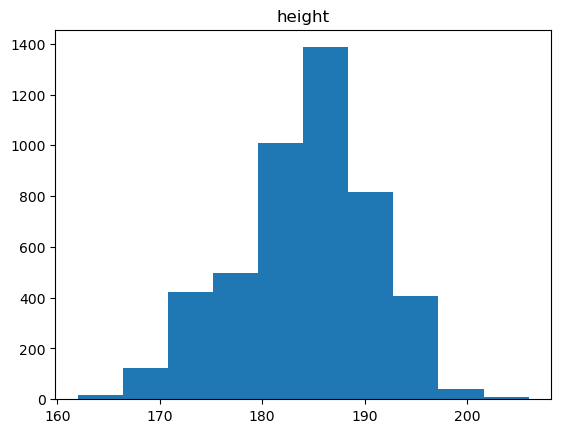

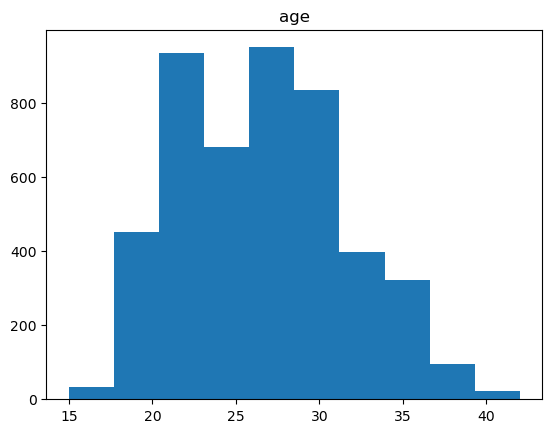

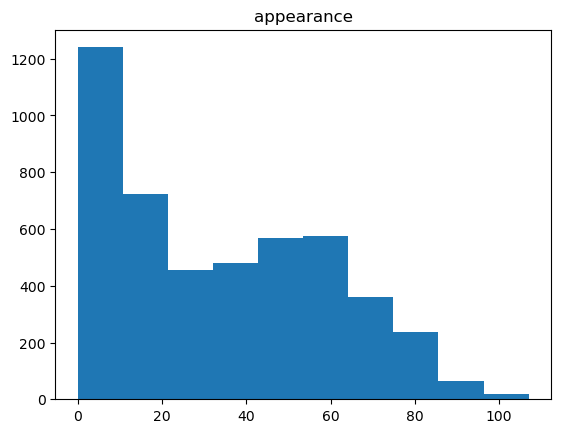

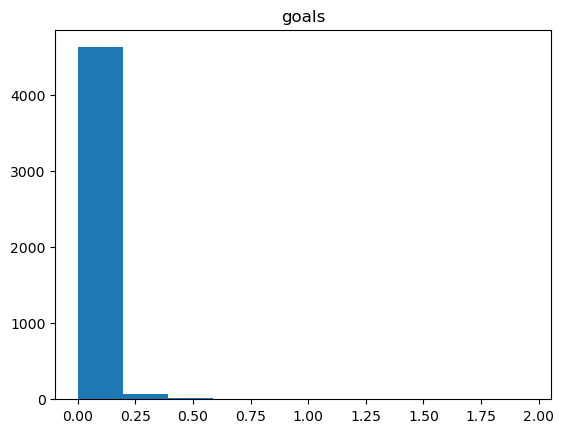

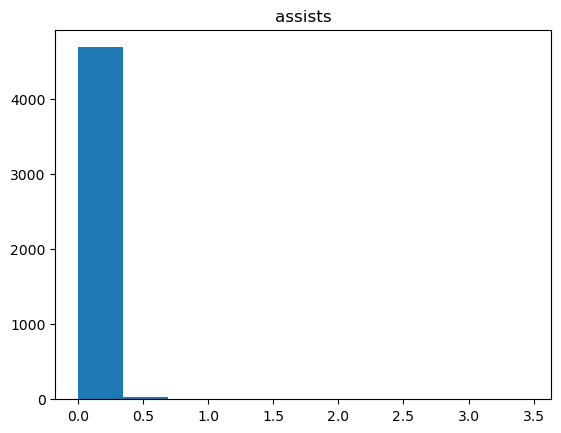

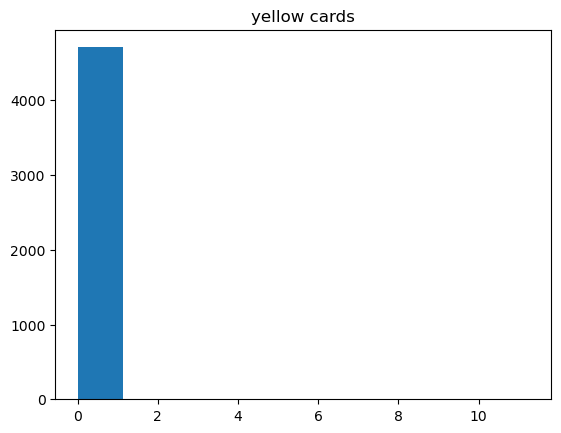

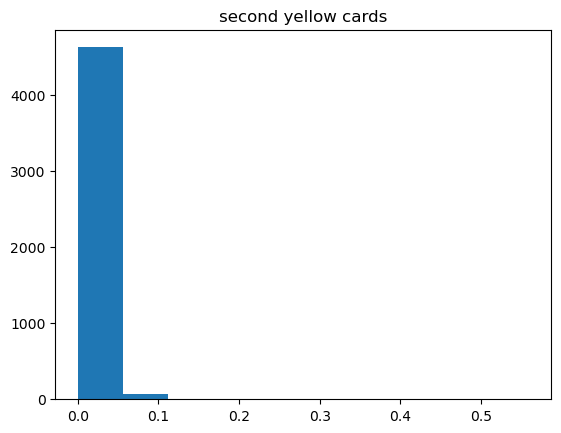

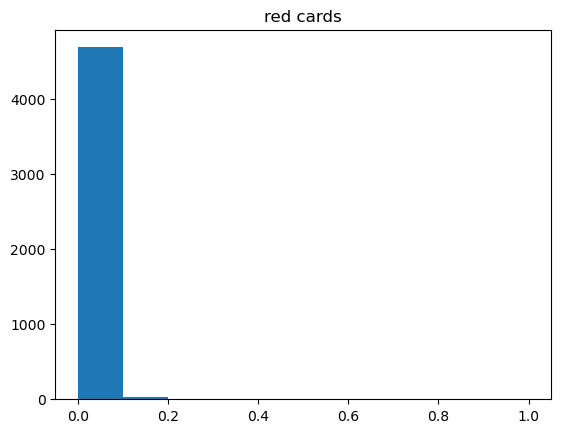

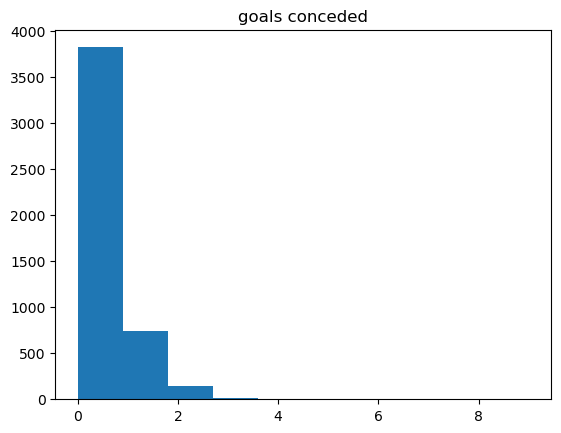

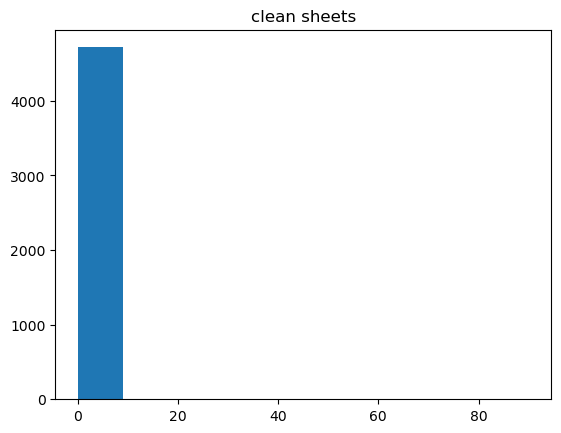

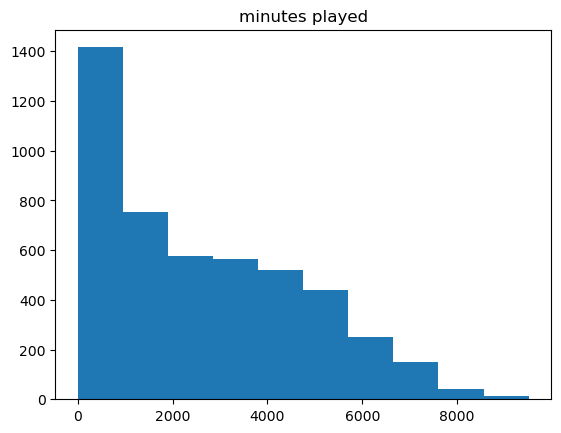

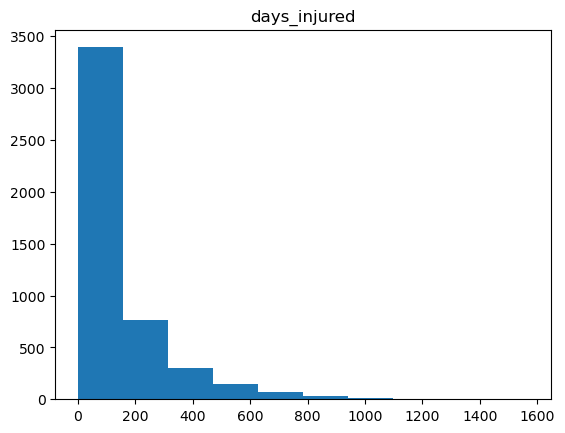

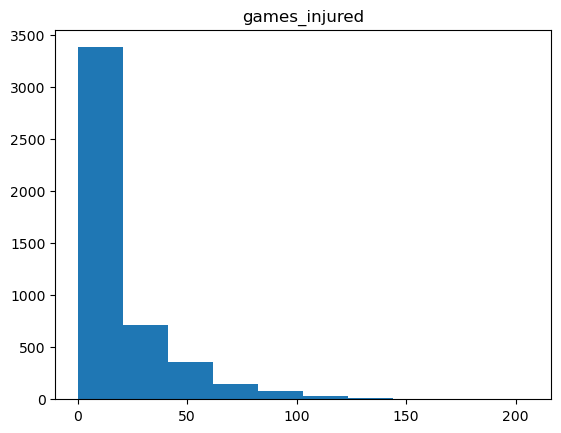

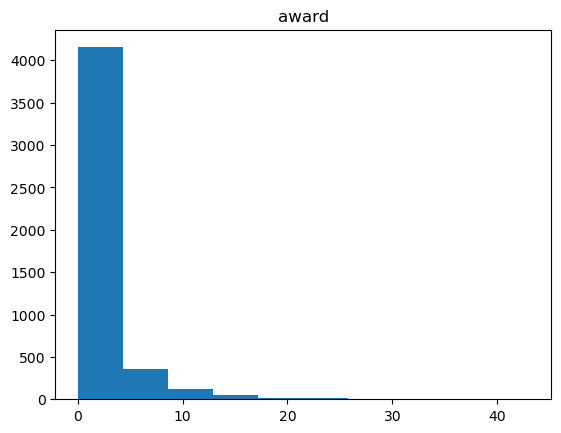

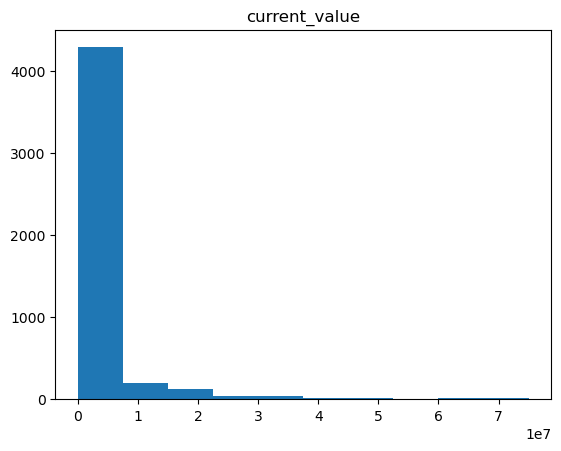

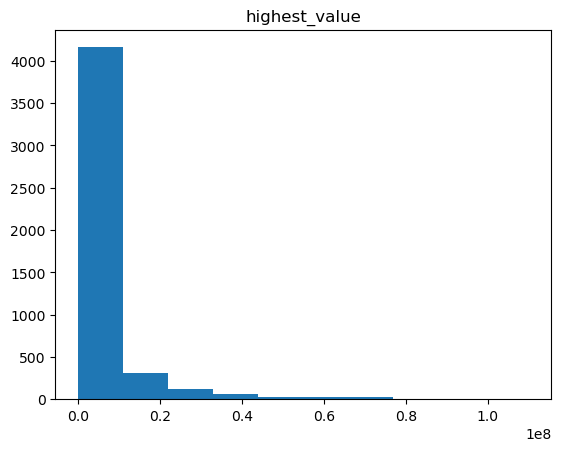

In [50]:
# dataset 1: gkeeper_defender 
# now let's see the numerical values
for x in gkeeper_defender_numerical:
    plt.hist([df_gkeeper_defender[x]])
    plt.title(x)
    plt.show()

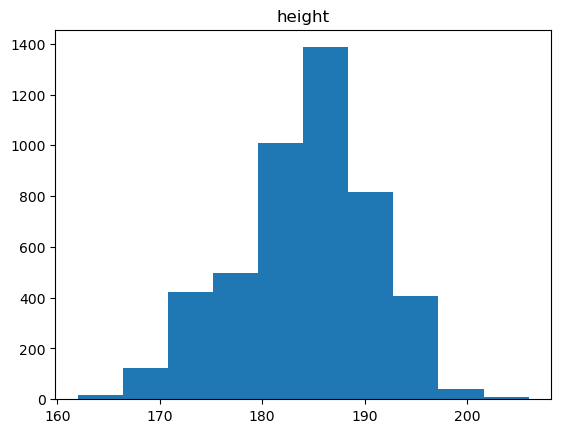

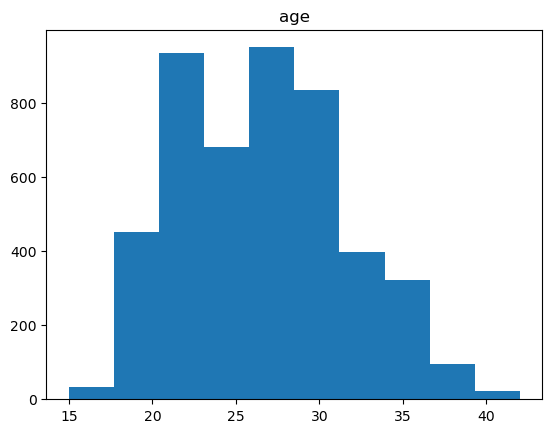

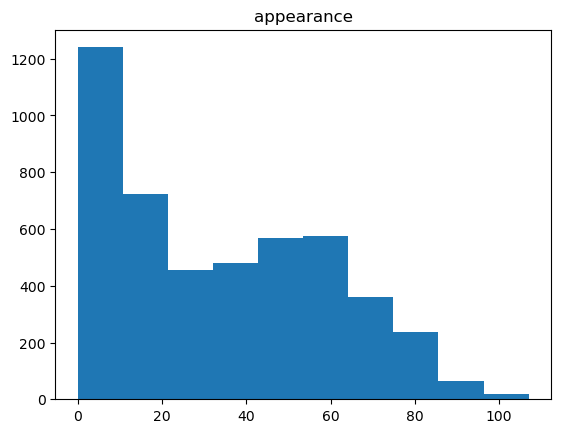

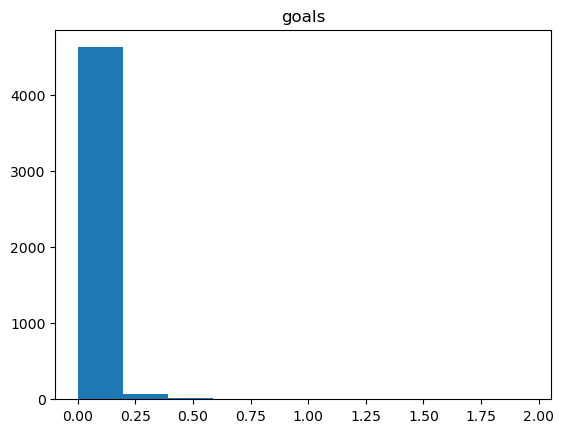

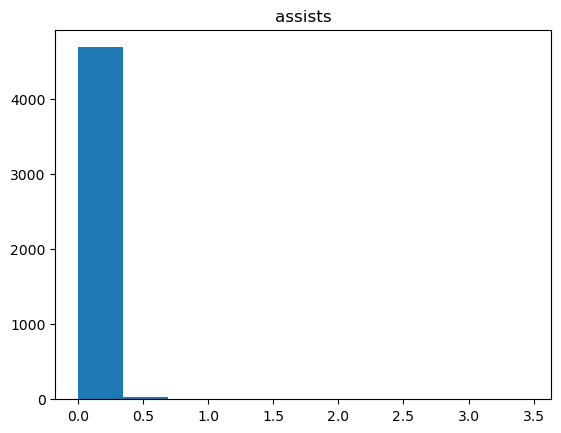

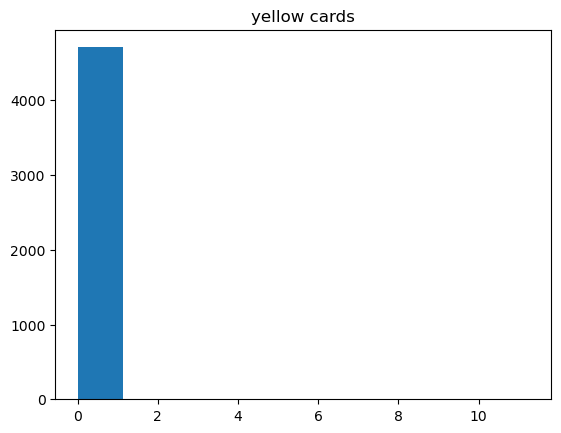

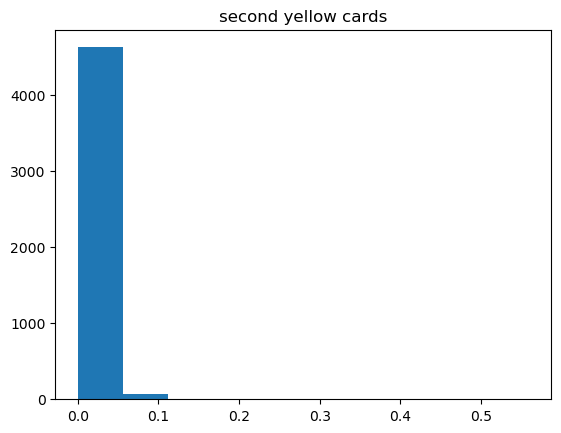

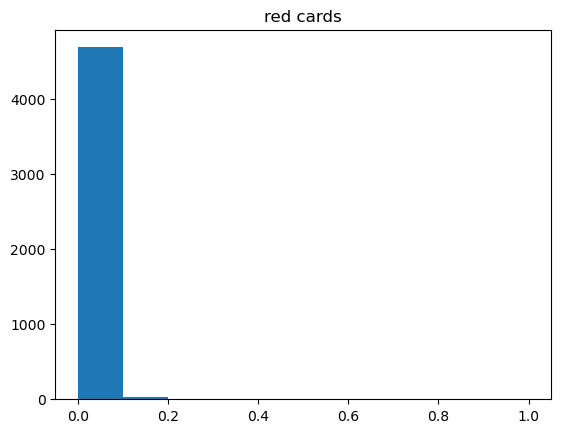

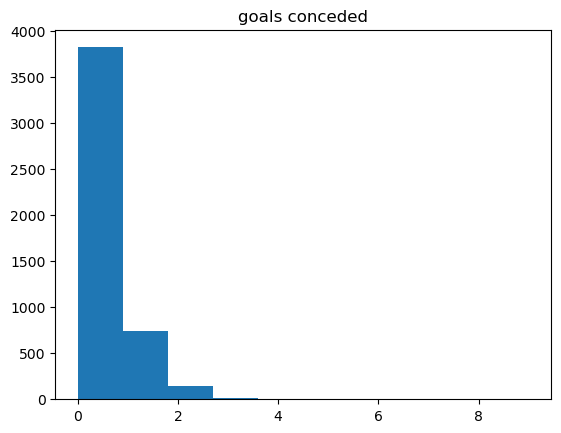

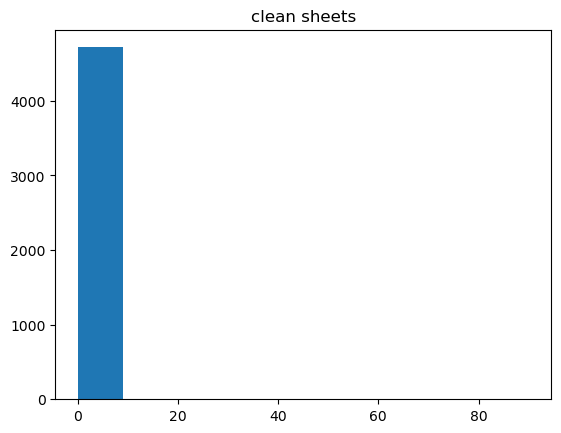

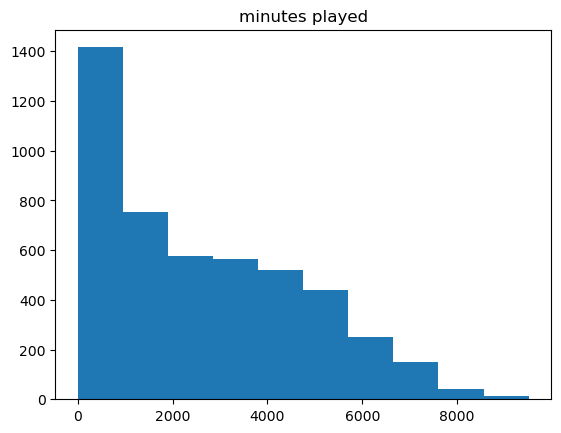

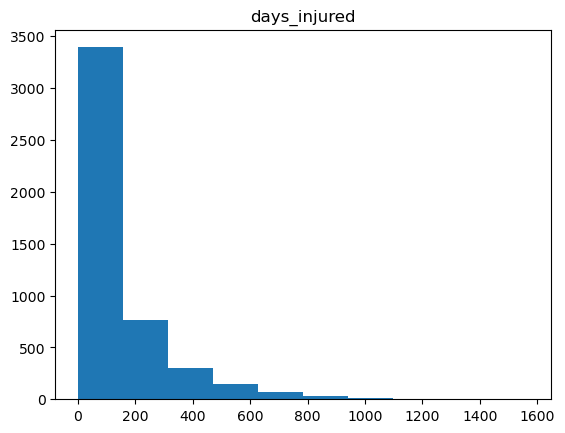

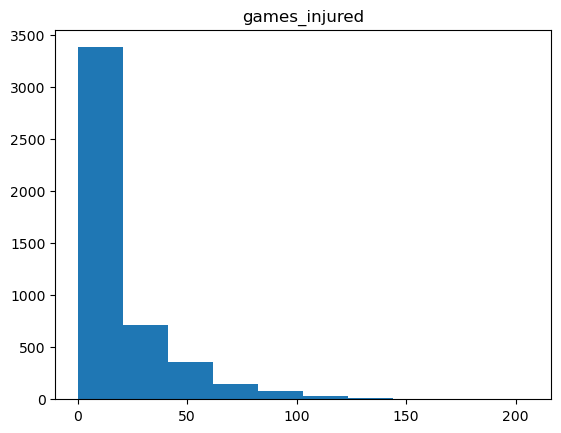

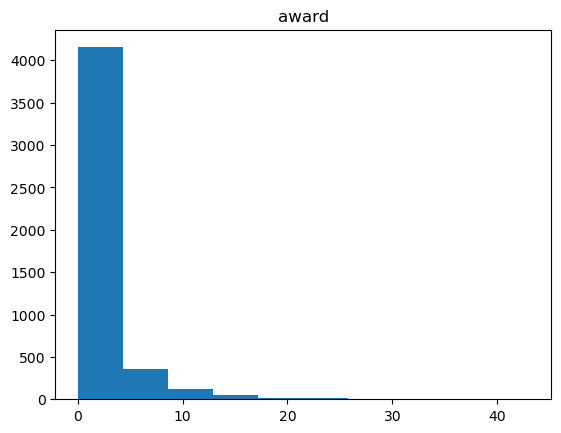

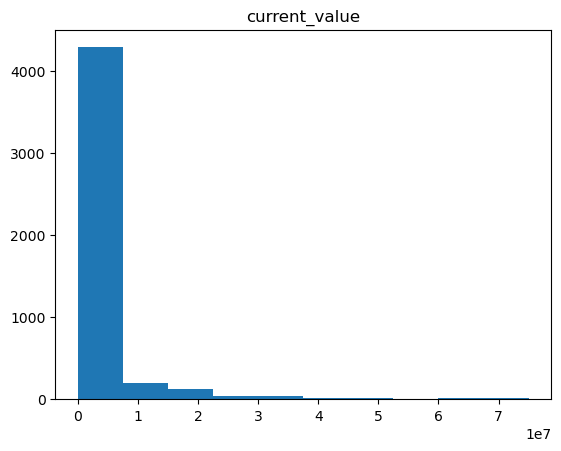

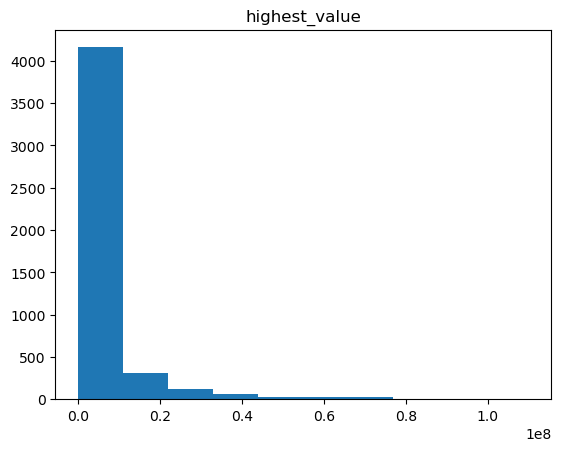

In [51]:
# dataset 2: rest_players 
# now let's see the numerical values
for x in rest_players_numerical:
    plt.hist([df_gkeeper_defender[x]])
    plt.title(x)
    plt.show()
    

In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 